# RETAIL ANALYTICS

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind , f_oneway

#### Importing dataset

In [2]:
retail_df = pd.read_csv("C:/Users/Ashish/Desktop/DSML/SCALER/scaler_ project/project 3_clt and_ci_Walmart/walmart.csv")

In [3]:
#checking out the dataset
retail_df.head(15)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871


In [4]:
# Replace 'M' with 'Male' and 'F' with 'Female' in the 'Gender' column
retail_df["Gender"].replace({'M':"Male" , 'F':"Female"},inplace =True) 
retail_df["Marital_Status"].replace({0:"Not_married" , 1:"Maried"},inplace =True) 
retail_df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,Female,0-17,10,A,2,Not_married,3,8370
1,1000001,P00248942,Female,0-17,10,A,2,Not_married,1,15200
2,1000001,P00087842,Female,0-17,10,A,2,Not_married,12,1422
3,1000001,P00085442,Female,0-17,10,A,2,Not_married,12,1057
4,1000002,P00285442,Male,55+,16,C,4+,Not_married,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,Male,51-55,13,B,1,Maried,20,368
550064,1006035,P00375436,Female,26-35,1,C,3,Not_married,20,371
550065,1006036,P00375436,Female,26-35,15,B,4+,Maried,20,137
550066,1006038,P00375436,Female,55+,1,C,2,Not_married,20,365


## Dataset basic info :

In [5]:
# Information about the structure and characteristics of a DataFrame. 

dataset_info = retail_df.info()
print(dataset_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 42.0+ MB
None


## Univariate Analysis

#### 1. Purchase amount

1. Statistics for purchase amount

count    550068.0
mean       9264.0
std        5023.0
min          12.0
25%        5823.0
50%        8047.0
75%       12054.0
max       23961.0
Name: Purchase, dtype: float64

2. Outliers


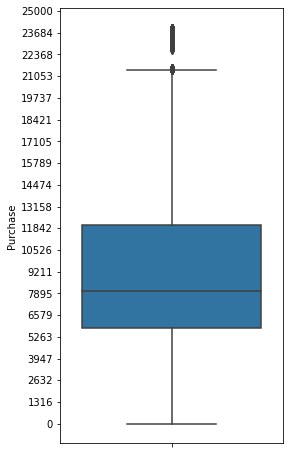

In [6]:
#1. Purchase -> Numerical data
print("1. Statistics for purchase amount\n")
print(np.round(retail_df.describe()["Purchase"],0))
print()

#2. Outliers

print("2. Outliers")
plt.figure(figsize = (4,8))
plt.yticks(np.linspace(0,25000,20))
sns.boxplot(data = retail_df,
           y = "Purchase")
plt.show()


In [7]:
print("Total no. of outliers in purchase column will be :")
print(retail_df.loc[retail_df["Purchase"] > 21000]["Purchase"].count())
print()

# 3. Top 3 user id that purchased the most : no the basis of freuency of purchase

print("3. Top 3 user id that purchased the most : no the basis of freuency of purchase")
print(retail_df["User_ID"].value_counts(ascending = False).head(3))
print()

# 4. Top 3 user id that purchased the most : no the basis of total purchase

print("4. Top 3 user id that purchased the most : no the basis of total purchase")
print(retail_df.groupby("User_ID")["Purchase"].sum().sort_values(ascending = False).head(3))
print()

# 5. Missing values

print("5. Missing values in the dataset")
print(retail_df["Purchase"].isna().sum())


Total no. of outliers in purchase column will be :
3541

3. Top 3 user id that purchased the most : no the basis of freuency of purchase
1001680    1026
1004277     979
1001941     898
Name: User_ID, dtype: int64

4. Top 3 user id that purchased the most : no the basis of total purchase
User_ID
1004277    10536909
1001680     8699596
1002909     7577756
Name: Purchase, dtype: int64

5. Missing values in the dataset
0


#### Conclusion:

####  2. Product_id

1.How many unique product_id are there in the dataset?
No. of Unique Products :3631

2. Missing values in the dataset
0

3. Top 5 user id that purchased the most : on the basis of total purchase


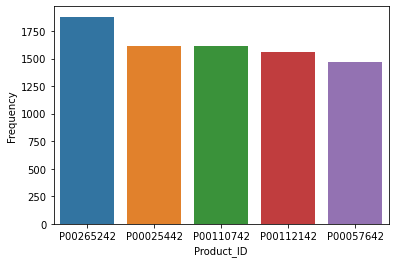

In [8]:
# 1. Unique values

print("1.How many unique product_id are there in the dataset?")
print(f'No. of Unique Products :{retail_df["Product_ID"].nunique()}')
print()

# 2. Missing values

print("2. Missing values in the dataset")
print(retail_df["Purchase"].isna().sum())
print()

# 3. Top 5 Product id : on the basis of frequency 

print("3. Top 5 user id that purchased the most : on the basis of total purchase")

top_products = retail_df["Product_ID"].value_counts(ascending=False).head(5)

# Create a DataFrame with the top products and their frequencies
w = pd.DataFrame({"Product_ID": top_products.index, "Frequency": top_products.values})

sns.barplot(data = w,
              x    = "Product_ID",
              y = "Frequency")
plt.show()


#### 3. Gender

1. Missing values :
0



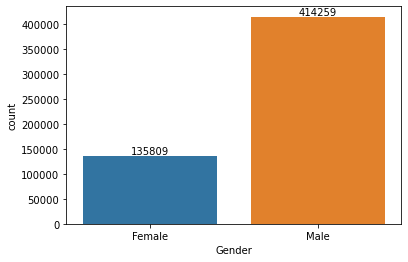

In [9]:
# 1. Missing values

print("1. Missing values :")
print(retail_df["Gender"].isna().sum())
print()

# 2. Gender counts

pl = sns.countplot(data = retail_df,
              x    = "Gender"
              )
for i in pl.containers:
    pl.bar_label(i,)    
plt.show()



#### 4. Age

Frequency of purchase on the basis of age


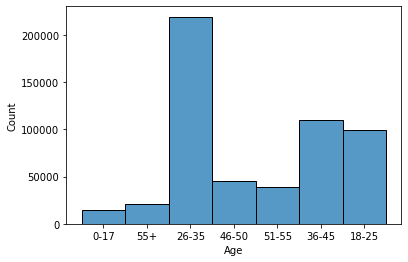

In [10]:
print("Frequency of purchase on the basis of age")
retail_df["Age"].value_counts(ascending = False)

sns.histplot(data = retail_df,
             x = "Age"
             )
plt.show()

#### 5. Occupation

Frequency of purchase on the basis of age


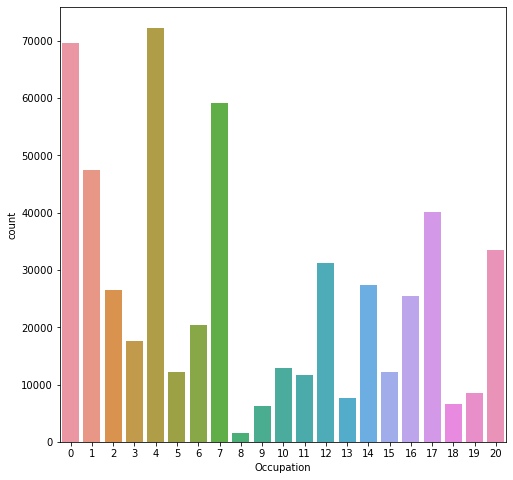

In [11]:

print("Frequency of purchase on the basis of age")
retail_df["Occupation"].value_counts(ascending = False)

plt.figure(figsize=(8,8))
sns.countplot(data = retail_df,
             x = "Occupation"
             )
plt.show()

#### 6. Stay_in_Current_Years

Frequency of purchase on the basis of Stay_in_Current_Years


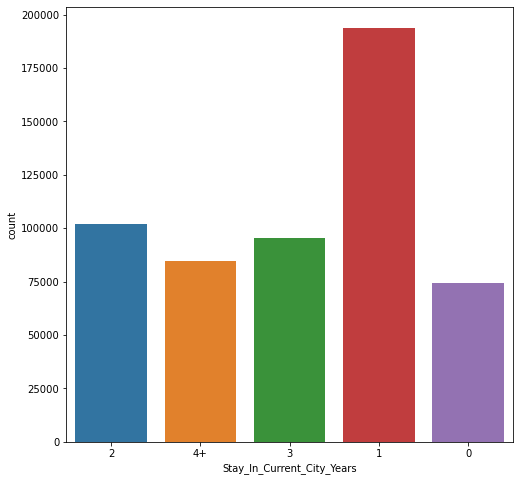

In [12]:
print("Frequency of purchase on the basis of Stay_in_Current_Years")
retail_df["Occupation"].value_counts(ascending = False)

plt.figure(figsize=(8,8))
sns.countplot(data = retail_df,
             x = "Stay_In_Current_City_Years"
             )
plt.show()

#### 7. City_Category

Frequency of purchase on the basis of city category


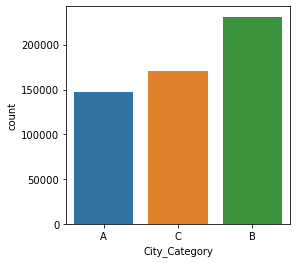

In [13]:
print("Frequency of purchase on the basis of city category")
retail_df["Occupation"].value_counts(ascending = False)

plt.figure(figsize=(4,4))
sns.countplot(data = retail_df,
             x = "City_Category"
             )
plt.show()

## Bivariate Analysis

#### 1. Gender vs Purchase 

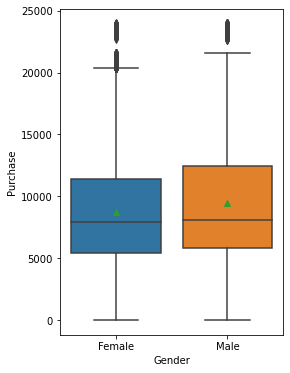

Sample Mean for expenditure based on gender


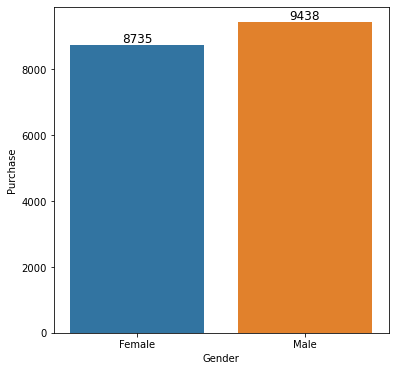

In [14]:
plt.figure(figsize = (4,6))

sns.boxplot(data = retail_df,
           y = "Purchase",
           x = "Gender" ,
           showmeans=True)
plt.show()

# 1 . Sample Mean for expenditure based on gender

print("Sample Mean for expenditure based on gender")
mean_df = pd.DataFrame(retail_df.groupby("Gender")["Purchase"].mean().round(0)).reset_index()

#print(mean_df)

plt.figure(figsize=(6, 6))
mean_pur = sns.barplot(data=mean_df, x="Gender", y="Purchase")

# Add bar labels (rounded mean values) to the bars
for p in mean_pur.containers:
    mean_pur.bar_label(p, label_type='edge', fontsize=12)
    

#### 2. Marital_Status vs Purchase

Sample Mean for expenditure based on marital status


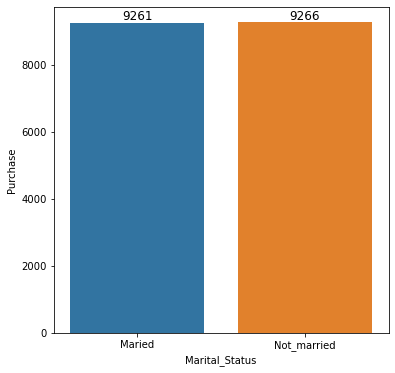

Sample Mean for expenditure based on marital status


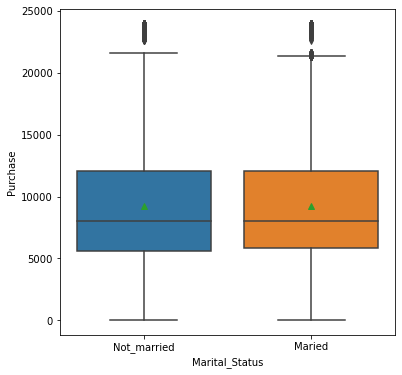

In [15]:
# 1 . Sample Mean for expenditure based on marital status

print("Sample Mean for expenditure based on marital status")
mean_df = pd.DataFrame(retail_df.groupby("Marital_Status")["Purchase"].mean().round(0)).reset_index()

#print(mean_df)

plt.figure(figsize=(6, 6))
mean_pur = sns.barplot(data=mean_df,
                       x="Marital_Status",
                       y="Purchase",
                      )

# Add bar labels (rounded mean values) to the bars
for p in mean_pur.containers:
    mean_pur.bar_label(p, label_type='edge', fontsize=12)

plt.show()

print("Sample Mean for expenditure based on marital status")

plt.figure(figsize=(6, 6))
mean_pur = sns.boxplot(data = retail_df,
                       x= "Marital_Status",
                       y= "Purchase",
                      showmeans = True)
plt.show()


#### 3. Occupation vs Purchase

Sample Mean for expenditure based on occupation


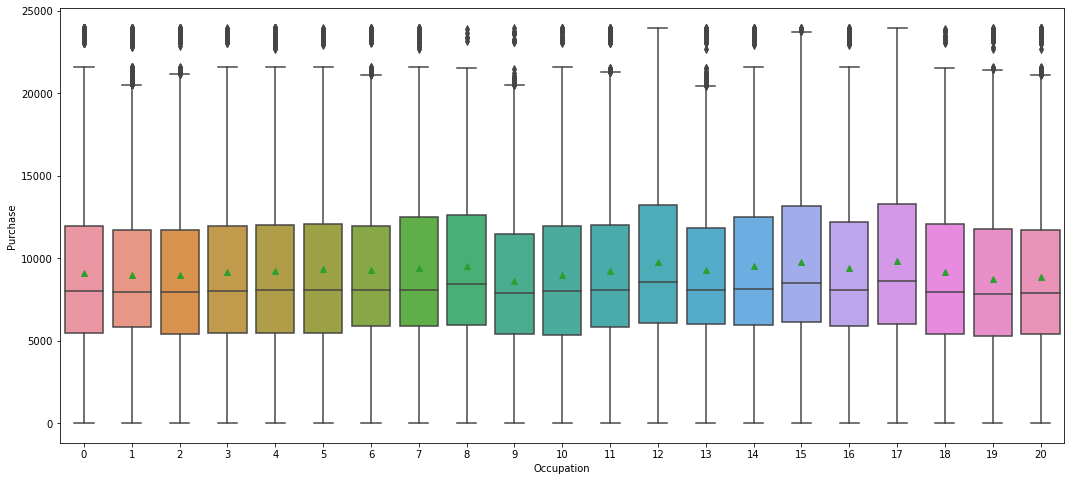

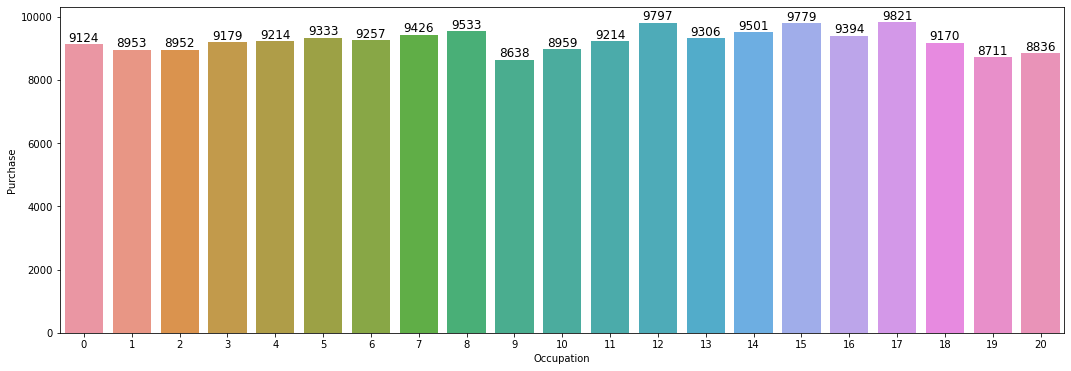

In [16]:
print("Sample Mean for expenditure based on occupation")
plt.figure(figsize=(18, 8))
mean_pur = sns.boxplot(data = retail_df,
                       x= "Occupation",
                       y= "Purchase",
                      showmeans = True)
plt.show()


mean_df = pd.DataFrame(retail_df.groupby("Occupation")["Purchase"].mean().round(0)).reset_index()

#print(mean_df)

plt.figure(figsize=(18, 6))
mean_pur = sns.barplot(data=mean_df,
                       x="Occupation",
                       y="Purchase",
                      )

# Add bar labels (rounded mean values) to the bars
for p in mean_pur.containers:
    mean_pur.bar_label(p, label_type='edge', fontsize=12)

plt.show()

#### 5. Age vs Purchase

Sample Mean for expenditure based on age bin


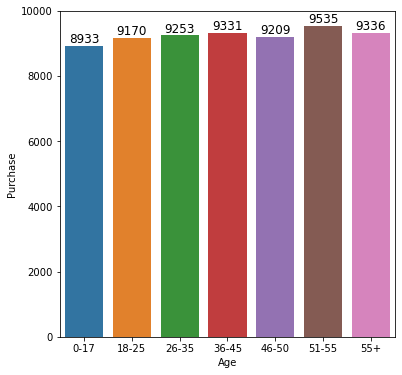

In [17]:
print("Sample Mean for expenditure based on age bin")
mean_df_age = pd.DataFrame(retail_df.groupby("Age")["Purchase"].mean().round(0)).reset_index()

#print(mean_df)

plt.figure(figsize=(6, 6))
mean_age = sns.barplot(data=mean_df_age,
                       x="Age",
                       y="Purchase",
                      )

# Add bar labels (rounded mean values) to the bars
for p in mean_age.containers:
    mean_age.bar_label(p, label_type='edge', fontsize=12)

#### 6. Stay_in_city_year vs Purchase

Sample Mean for expenditure based on age bin


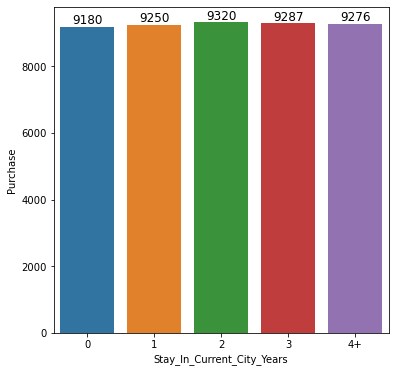

In [18]:
print("Sample Mean for expenditure based on age bin")
mean_df_age = pd.DataFrame(retail_df.groupby("Stay_In_Current_City_Years")["Purchase"].mean().round(0)).reset_index()

#print(mean_df)

plt.figure(figsize=(6, 6))
mean_age = sns.barplot(data=mean_df_age,
                       x="Stay_In_Current_City_Years",
                       y="Purchase",
                      )

# Add bar labels (rounded mean values) to the bars
for p in mean_age.containers:
    mean_age.bar_label(p, label_type='edge', fontsize=12)

#### 7. City Category vs Purchase

Sample Mean for expenditure based on age bin


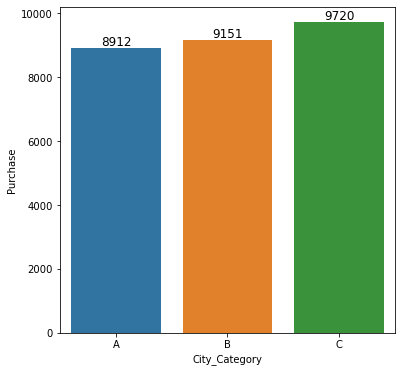

In [19]:
print("Sample Mean for expenditure based on age bin")
mean_df_age = pd.DataFrame(retail_df.groupby("City_Category")["Purchase"].mean().round(0)).reset_index()

#print(mean_df)

plt.figure(figsize=(6, 6))
mean_age = sns.barplot(data=mean_df_age,
                       x="City_Category",
                       y="Purchase",
                      )

# Add bar labels (rounded mean values) to the bars
for p in mean_age.containers:
    mean_age.bar_label(p, label_type='edge', fontsize=12)

## Sampling and Confidence interval

## 1. Gender

#### 1. Are women spending more money per transaction than men? Why or Why not? 

Sample Mean for expenditure based on gender


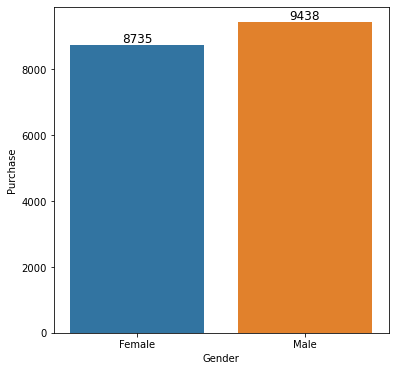

In [20]:
# 1 . Sample Mean for expenditure based on gender

print("Sample Mean for expenditure based on gender")
mean_df = pd.DataFrame(retail_df.groupby("Gender")["Purchase"].mean().round(0)).reset_index()

#print(mean_df)

plt.figure(figsize=(6, 6))
mean_pur = sns.barplot(data=mean_df,
                       x="Gender",
                       y="Purchase",
                      )

# Add bar labels (rounded mean values) to the bars
for p in mean_pur.containers:
    mean_pur.bar_label(p, label_type='edge', fontsize=12)
    

### Reason 

#### 1. Marital_status

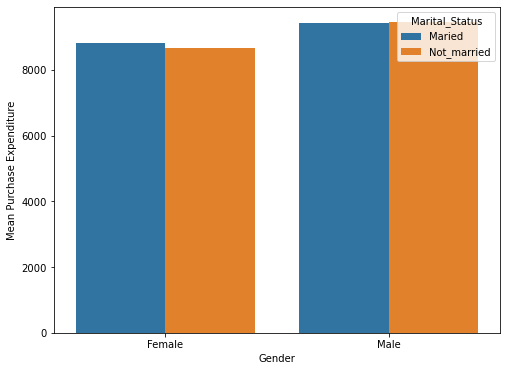

In [21]:
# Group by "Gender" and "Marital_Status" and calculate the mean purchase expenditure
mean_df = retail_df.groupby(["Gender", "Marital_Status"])["Purchase"].mean().reset_index()

plt.figure(figsize=(8, 6))
mean_pur = sns.barplot(data=mean_df,
                       x="Gender",
                       y="Purchase",
                       hue="Marital_Status")

# Add axis labels
plt.xlabel("Gender")
plt.ylabel("Mean Purchase Expenditure")

# Show the plot
plt.show()


In [22]:
marital_status_counts = pd.crosstab(index= retail_df["Gender"] , columns = retail_df["Marital_Status"],margins = True)
print(marital_status_counts)

Marital_Status  Maried  Not_married     All
Gender                                     
Female           56988        78821  135809
Male            168349       245910  414259
All             225337       324731  550068


#### 2. Product category

In [23]:
average_purchase_by_product_category = retail_df.groupby('Product_Category')['Purchase'].mean()
average_purchase_by_product_category_top_five  = average_purchase_by_product_category.sort_values(ascending=False).head(10)


In [24]:
average_purchase_by_product_category_top_five.round(0)

Product_Category
10    19676.0
7     16366.0
6     15838.0
9     15537.0
15    14780.0
16    14766.0
1     13606.0
14    13142.0
2     11252.0
17    10171.0
Name: Purchase, dtype: float64

In [25]:
retail_df.loc[retail_df["Gender"] == "Male"]["Product_Category"].value_counts(ascending =False).head(10)

1     115547
5     108972
8      80367
11     19548
2      18206
6      15907
3      14207
4       8114
16      7426
15      5244
Name: Product_Category, dtype: int64

In [26]:
retail_df.loc[retail_df["Gender"] == "Female"]["Product_Category"].value_counts(ascending =False).head(10)

5     41961
8     33558
1     24831
3      6006
2      5658
11     4739
6      4559
4      3639
16     2402
12     1532
Name: Product_Category, dtype: int64

#### 3. Occupation

In [27]:
retail_df.loc[retail_df["Gender"] == "Male"]["Occupation"].value_counts(ascending =False).head(10)

4     54472
0     51526
7     49105
17    36114
1     29442
12    27710
20    24751
16    21264
14    20546
2     17959
Name: Occupation, dtype: int64

In [28]:
retail_df.loc[retail_df["Gender"] == "Female"]["Occupation"].value_counts(ascending =False).head(10)

0     18112
1     17984
4     17836
7     10028
20     8811
2      8629
6      8160
3      7919
14     6763
9      5843
Name: Occupation, dtype: int64

In [29]:
average_purchase_by_occupation = retail_df.groupby('Occupation')['Purchase'].mean()
average_purchase_by_occupation_sorted = average_purchase_by_occupation.sort_values(ascending=False)
average_purchase_by_occupation_sorted.head()

Occupation
17    9821.478236
12    9796.640239
15    9778.891163
8     9532.592497
14    9500.702772
Name: Purchase, dtype: float64

#### 4. By age

In [30]:
retail_df.groupby("Gender")["Age"].value_counts(ascending = False)

Gender  Age  
Female  26-35     50752
        36-45     27170
        18-25     24628
        46-50     13199
        51-55      9894
        0-17       5083
        55+        5083
Male    26-35    168835
        36-45     82843
        18-25     75032
        46-50     32502
        51-55     28607
        55+       16421
        0-17      10019
Name: Age, dtype: int64

In [31]:
purchase_by_age = retail_df.groupby("Age")["Purchase"].mean().sort_values(ascending = False)
purchase_by_age

Age
51-55    9534.808031
55+      9336.280459
36-45    9331.350695
26-35    9252.690633
46-50    9208.625697
18-25    9169.663606
0-17     8933.464640
Name: Purchase, dtype: float64

#### Conclusion 

### 2. Confidence intervals and distribution of the mean of the expenses by female and male customers

### *** Bootstrapping ***

#### Creating sampling distribution using Bootstrapped mean

The distribution of mean value of amount spent by Female per transaction for 1000 survey for entire dataset


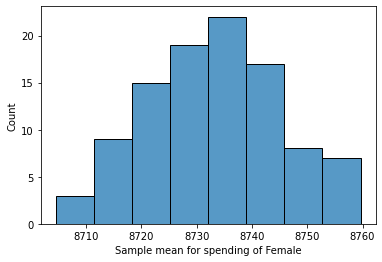

95% Confidence interval for amount spent by Female per transaction
[8710.51 8756.72]

The distribution of mean value of amount spent by Male per transaction for 1000 survey for entire dataset


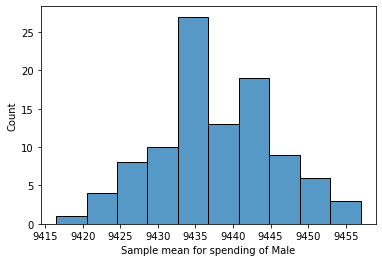

95% Confidence interval for amount spent by Male per transaction
[9422.02 9453.36]



In [32]:
# Bootstrap sampling

# Number of bootstrap iterations
n_iterations = 100

# List to store bootstrapped means
bootstrapped_mean_survey = []  # it will nested list which will contain one list of mean for male and female

gen_uni_value = retail_df["Gender"].unique()
for val in gen_uni_value:
    
    gen_mean_list = [] # gender wise mean list that will be appended to bootstrapped_mean_survey
    
    for samp in range(n_iterations):
        
        filter_df = retail_df[retail_df["Gender"] == val]["Purchase"]
        
        # Create a bootstrap sample of customers (with replacement)
        random_sample = filter_df.sample(frac = 1, replace=True)
    
        # Calculate the sample mean for the current bootstrap sample
        sample_mean = random_sample.mean()
    
        # Append the sample mean to the list of bootstrapped means
        gen_mean_list.append(sample_mean)
    
    bootstrapped_mean_survey.append(gen_mean_list)
    
# Distribution of sample mean of 1000 survey using bootstrap and furnishing confidence interval    
    
# x for indexing
x = 0
for gen in gen_uni_value:  
    
    # Distribution of mean values for 1000 surveys
    
    print(f"The distribution of mean value of amount spent by {gen} per transaction for 1000 survey for entire dataset")
    sns.histplot(x = bootstrapped_mean_survey[x])
    plt.xlabel(f"Sample mean for spending of {gen}")
    plt.show()
    
    # 95% confidence interval
    
    # Calculate the confidence interval (e.g., 95% confidence interval)
    print(f"95% Confidence interval for amount spent by {gen} per transaction")
    print(np.percentile(bootstrapped_mean_survey[x],[2.5, 97.5]).round(2))
    print()
    x+=1

### ** CENTRAL LIMIT THEOREM **

In [33]:
# Split data into male and female samples
sample_male = retail_df.loc[retail_df["Gender"] == "Male"]
sample_female = retail_df.loc[retail_df["Gender"] == "Female"]

# Confidence level
confidence_level = 0.95

# Sample sizes
sample_size_male = len(sample_male)
sample_size_female = len(sample_female)

# Sample means
sample_mean_male = sample_male["Purchase"].mean()
sample_mean_female = sample_female["Purchase"].mean()

# Sample standard deviations (with Bessel's correction)
sample_std_male = np.std(sample_male["Purchase"], ddof=1)
sample_std_female = np.std(sample_female["Purchase"], ddof=1)

# Degrees of freedom for t-distribution
degree_of_freedom_male = sample_size_male - 1
degree_of_freedom_female = sample_size_female - 1

# Calculate the standard error of the mean
standard_error_male = sample_std_male / np.sqrt(sample_size_male)
standard_error_female = sample_std_female / np.sqrt(sample_size_female)

# Calculate the t-scores for the given confidence level and degrees of freedom
t_score_male = stats.t.ppf((1 + confidence_level) / 2, df=degree_of_freedom_male)
t_score_female = stats.t.ppf((1 + confidence_level) / 2, df=degree_of_freedom_female)

# Calculate the margin of error
margin_of_error_male = t_score_male * standard_error_male
margin_of_error_female = t_score_female * standard_error_female

# Calculate the confidence intervals
confidence_interval_male = (sample_mean_male - margin_of_error_male, sample_mean_male + margin_of_error_male)
confidence_interval_female = (sample_mean_female - margin_of_error_female, sample_mean_female + margin_of_error_female)

print("Confidence Interval for Male Purchases:", confidence_interval_male)
print("Confidence Interval for Female Purchases:", confidence_interval_female)

Confidence Interval for Male Purchases: (9422.019402055814, 9453.032678888716)
Confidence Interval for Female Purchases: (8709.21132117373, 8759.92020913722)


### 3. Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?

### --> Non overlapping

### --> Improvement and changes that can be implemented from this conclusion

## 2. Marital Status

Sample Mean for expenditure based on marital status


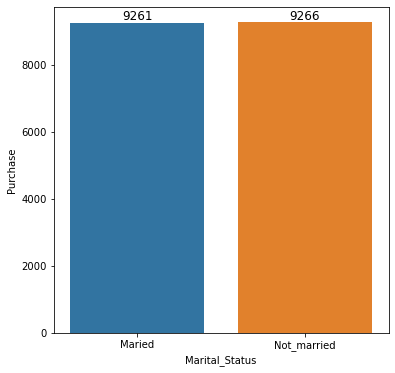

In [34]:
# 1 . Sample Mean for expenditure based on marital status

print("Sample Mean for expenditure based on marital status")
mean_df = pd.DataFrame(retail_df.groupby("Marital_Status")["Purchase"].mean().round(0)).reset_index()

#print(mean_df)

plt.figure(figsize=(6, 6))
mean_pur = sns.barplot(data=mean_df,
                       x="Marital_Status",
                       y="Purchase",
                      )

# Add bar labels (rounded mean values) to the bars
for p in mean_pur.containers:
    mean_pur.bar_label(p, label_type='edge', fontsize=12)

Sample Mean for expenditure based on marital status


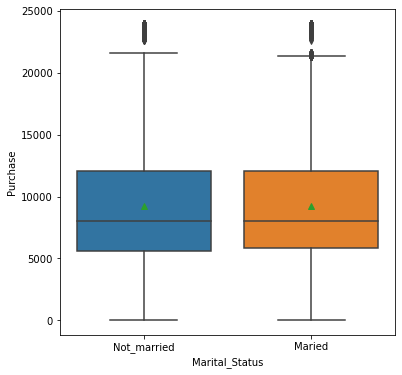

In [35]:
print("Sample Mean for expenditure based on marital status")

plt.figure(figsize=(6, 6))
mean_pur = sns.boxplot(data = retail_df,
                       x= "Marital_Status",
                       y= "Purchase",
                      showmeans = True)
plt.show()

## ** Bootstrapping**

#### Creating sampling distribution using Bootstrapped mean constructing confidence interval

The distribution of mean value of amount spent by Not_married per transaction for 1000 survey for entire dataset


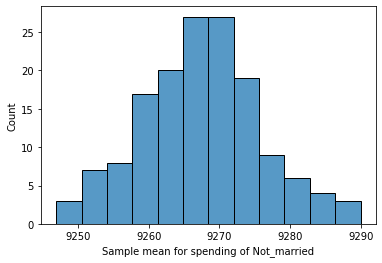

95% Confidence interval for amount spent by Not_married per transaction
[9251.92 9285.8 ]

The distribution of mean value of amount spent by Maried per transaction for 1000 survey for entire dataset


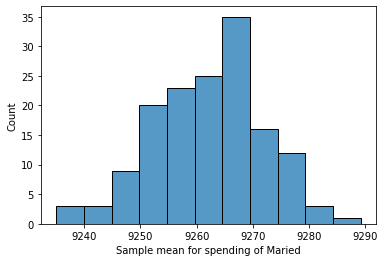

95% Confidence interval for amount spent by Maried per transaction
[9243.14 9279.38]



In [36]:
# Bootstrap sampling

# Number of bootstrap iterations
n_iterations = 150

# List to store bootstrapped means
bootstrapped_mean_survey = []  # it will nested list which will contain one list of mean for male and female

mar_uni_value = retail_df["Marital_Status"].unique() # marital status unique value
for val in mar_uni_value:
    
    mar_mean_list = [] # gender wise mean list that will be appended to bootstrapped_mean_survey
    
    for samp in range(n_iterations):
        
        filter_df = retail_df[retail_df["Marital_Status"] == val]["Purchase"]
        
        # Create a bootstrap sample of customers (with replacement)
        random_sample = filter_df.sample(frac = 1, replace=True)
    
        # Calculate the sample mean for the current bootstrap sample
        sample_mean = random_sample.mean()
    
        # Append the sample mean to the list of bootstrapped means
        mar_mean_list.append(sample_mean)
    
    bootstrapped_mean_survey.append(mar_mean_list)
    
# Distribution of sample mean of 1000 survey using bootstrap and furnishing confidence interval    
    
# x for indexing
x = 0
for mar in mar_uni_value:  
    
    # Distribution of mean values for 1000 surveys
    
    print(f"The distribution of mean value of amount spent by {mar} per transaction for 1000 survey for entire dataset")
    sns.histplot(x = bootstrapped_mean_survey[x])
    plt.xlabel(f"Sample mean for spending of {mar}")
    plt.show()
    
    # 95% confidence interval
    
    # Calculate the confidence interval (e.g., 95% confidence interval)
    print(f"95% Confidence interval for amount spent by {mar} per transaction")
    print(np.percentile(bootstrapped_mean_survey[x],[2.5, 97.5]).round(2))
    print()
    x+=1

## ** CENTRAL LIMIT THEOREM **

In [37]:

# Split data into married and not married samples
sample_married = retail_df.loc[retail_df["Marital_Status"] == "Maried"]
sample_not_married = retail_df.loc[retail_df["Marital_Status"] == "Not_married"]

# Confidence level
confidence_level = 0.95

# Sample sizes
sample_size_married = len(sample_married)
sample_size_not_married = len(sample_not_married)

# Sample means
sample_mean_married = sample_married["Purchase"].mean()
sample_mean_not_married = sample_not_married["Purchase"].mean()

# Sample standard deviations (with Bessel's correction)
sample_std_married = np.std(sample_married["Purchase"], ddof=1)
sample_std_not_married = np.std(sample_not_married["Purchase"], ddof=1)

# Degrees of freedom for t-distribution
degree_of_freedom_married = sample_size_married - 1
degree_of_freedom_not_married = sample_size_not_married - 1

# Calculate the standard error of the mean
standard_error_married = sample_std_married / np.sqrt(sample_size_married)
standard_error_not_married = sample_std_not_married / np.sqrt(sample_size_not_married)

# Calculate the t-scores for the given confidence level and degrees of freedom
t_score_married = stats.t.ppf((1 + confidence_level) / 2, df=degree_of_freedom_married)
t_score_not_married = stats.t.ppf((1 + confidence_level) / 2, df=degree_of_freedom_not_married)

# Calculate the margin of error
margin_of_error_married = t_score_married * standard_error_married
margin_of_error_not_married = t_score_not_married * standard_error_not_married

# Calculate the confidence intervals
confidence_interval_married = (sample_mean_married - margin_of_error_married, sample_mean_married + margin_of_error_married)
confidence_interval_not_married = (sample_mean_not_married - margin_of_error_not_married, sample_mean_not_married + margin_of_error_not_married)

print("Confidence Interval for Married Purchases:", confidence_interval_married)
print("Confidence Interval for Not Married Purchases:", confidence_interval_not_married)


Confidence Interval for Married Purchases: (9240.460315792989, 9281.888832371758)
Confidence Interval for Not Married Purchases: (9248.616353737027, 9283.198884105987)


## 3. Age

Sample Mean for expenditure based on marital status


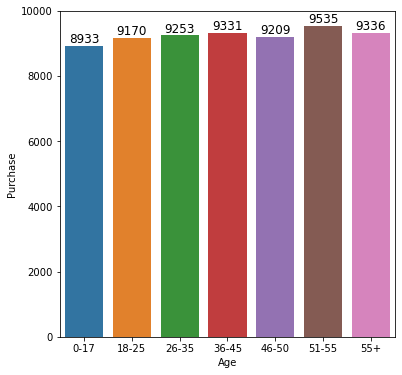

In [38]:
# 1 . Sample Mean for expenditure based on marital status

print("Sample Mean for expenditure based on marital status")
mean_df = pd.DataFrame(retail_df.groupby("Age")["Purchase"].mean().round(0)).reset_index()

#print(mean_df)

plt.figure(figsize=(6, 6))
mean_pur = sns.barplot(data=mean_df,
                       x="Age",
                       y="Purchase",
                      )

# Add bar labels (rounded mean values) to the bars
for p in mean_pur.containers:
    mean_pur.bar_label(p, label_type='edge', fontsize=12)

In [39]:
retail_df.head(6)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,Female,0-17,10,A,2,Not_married,3,8370
1,1000001,P00248942,Female,0-17,10,A,2,Not_married,1,15200
2,1000001,P00087842,Female,0-17,10,A,2,Not_married,12,1422
3,1000001,P00085442,Female,0-17,10,A,2,Not_married,12,1057
4,1000002,P00285442,Male,55+,16,C,4+,Not_married,8,7969
5,1000003,P00193542,Male,26-35,15,A,3,Not_married,1,15227


# Final Insights

#### From confidence interval 


#### From univariate and bivariate analysis

#### Comments on different variables when generalizing it for Population

## Recommendations